In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
# Checking the total missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data_no_mv = df.copy()

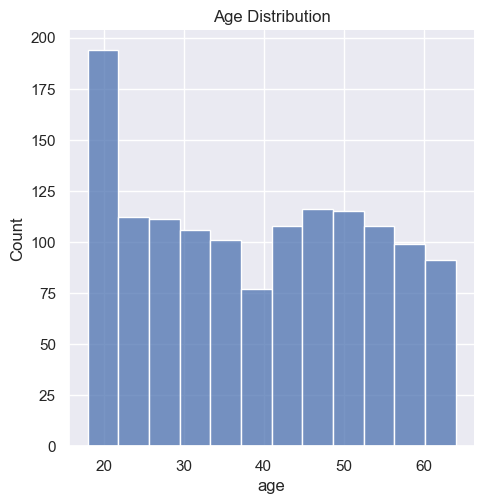

In [10]:
# Age distibution

sns.displot(data_no_mv['age'])
plt.title('Age Distribution')
plt.show()

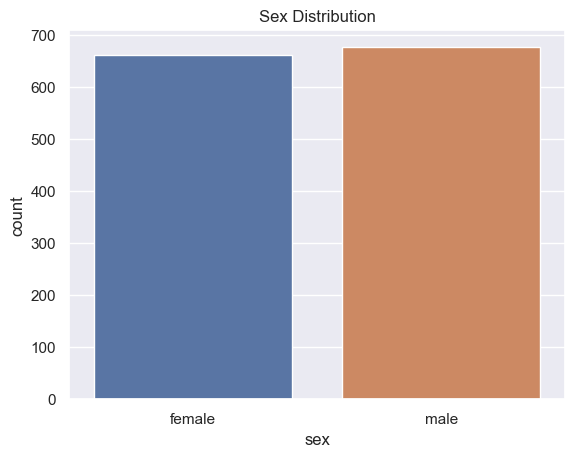

In [11]:
# Sex Distribution

sns.countplot(x = 'sex', data= data_no_mv)
plt.title('Sex Distribution')
plt.show()

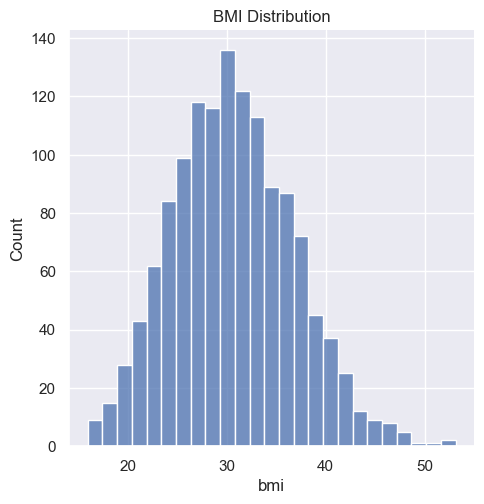

In [12]:
sns.displot(data_no_mv['bmi'])
plt.title('BMI Distribution')
plt.show()

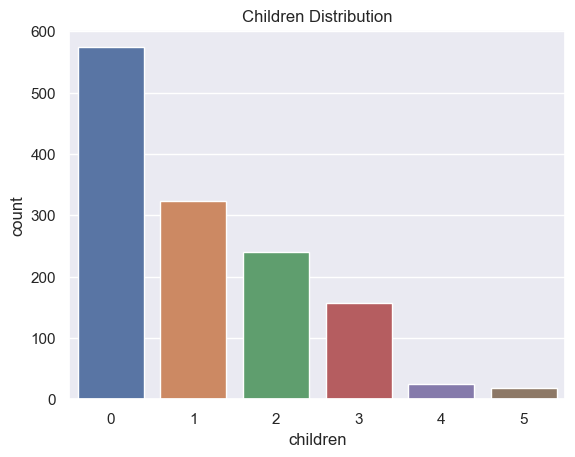

In [13]:
# Children Distribution

sns.countplot(x='children', data = data_no_mv)
plt.title('Children Distribution')
plt.show()

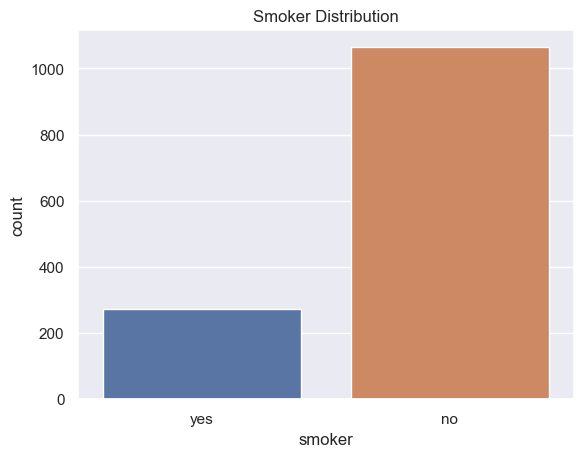

In [14]:
# Smoker Distribution

sns.countplot(x='smoker', data= data_no_mv)
plt.title('Smoker Distribution')
plt.show()

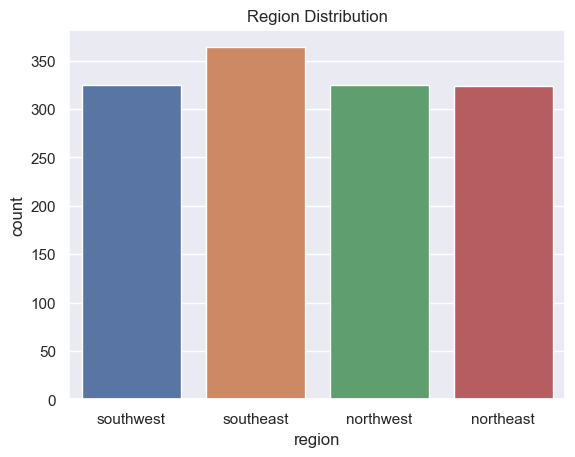

In [15]:
# Region Distribution

sns.countplot(x='region', data= data_no_mv)
plt.title('Region Distribution')
plt.show()

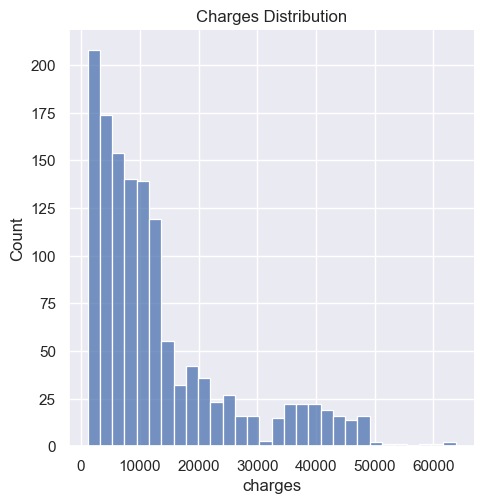

In [16]:
# Charges Distribution

sns.displot(data_no_mv['charges'])
plt.title('Charges Distribution')
plt.show()

In [17]:
# Categorical Features

data = data_no_mv.copy()


In [18]:
# Values of smoker

data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [19]:
# Creating dummy variable for sex

dummies = pd.get_dummies(data['sex'])
dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [20]:
# OneHotEncoder

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(data[['region']]).toarray()

In [22]:
feature_labels = ohe.categories_
print (feature_labels)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [23]:
# Creating one array

feature_labels = np.array(feature_labels).ravel()
print (feature_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [24]:
# Making dataframe of the labels

features = pd.DataFrame(feature_array, columns = feature_labels)
features.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [25]:
# Combining dummy variable and ohe columns

new_data = pd.concat([data, dummies, features], axis=1)
new_data = new_data.drop(columns='region', axis=1)
new_data = new_data.drop(columns='sex', axis=1)
new_data.head()

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,0,1,0.0,1.0,0.0,0.0


In [28]:
# Declare the variables

y = new_data.charges
x = new_data.drop(columns='charges', axis=1)

In [29]:
# Target variable

print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [30]:
# Features

print(x)

      age     bmi  children  smoker  female  male  northeast  northwest  \
0      19  27.900         0       1       1     0        0.0        0.0   
1      18  33.770         1       0       0     1        0.0        0.0   
2      28  33.000         3       0       0     1        0.0        0.0   
3      33  22.705         0       0       0     1        0.0        1.0   
4      32  28.880         0       0       0     1        0.0        1.0   
...   ...     ...       ...     ...     ...   ...        ...        ...   
1333   50  30.970         3       0       0     1        0.0        1.0   
1334   18  31.920         0       0       1     0        1.0        0.0   
1335   18  36.850         0       0       1     0        0.0        0.0   
1336   21  25.800         0       0       1     0        0.0        0.0   
1337   61  29.070         0       1       1     0        0.0        1.0   

      southeast  southwest  
0           0.0        1.0  
1           1.0        0.0  
2           

In [31]:
# Training data and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 2)

In [32]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 10) (1070, 10) (268, 10)


In [33]:
# Linear Regression

reg = LinearRegression()
reg.fit(x_train.values, y_train.values)

LinearRegression()

In [34]:
# Predicting training data

train_data_pred = reg.predict(x_train.values)

In [36]:
# R squared value

from sklearn import metrics
r2_train = metrics.r2_score(y_train, train_data_pred)
print('R squared value: ', r2_train)

R squared value:  0.7520187377309014


In [39]:
# Predicting testing data

test_data_pred = reg.predict(x_test.values)

In [40]:
# R square value

r2_test = metrics.r2_score(y_test, test_data_pred)
print('R sqaured value: ', r2_test)

R sqaured value:  0.7449415564623687


In [43]:
# Building Prediction
# Features used = age-31, sex-female, bmi-25.74, children-0, smoker-no, region-southeast

input_data = (31, 25.74, 0, 0, 1, 0, 0, 0, 1, 0)

In [44]:
# Changing input data into numpy array

array_data = np.asarray(input_data)

In [47]:
array_data_reshaped = array_data.reshape(1, -1)

In [48]:
prediction = reg.predict(array_data_reshaped)
print ('The cost of insurance is $', prediction)

The cost of insurance is $ [3811.11420936]
